In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import decorate, configure_plot_style, AIBM_COLORS

configure_plot_style()

In [3]:
from extract_pdf_data import extract_pdf_data

def read_pdfs():
    results = []
    for page_number in range(83, 375, 2):
        print(f"Processing page {page_number}...")
        data = extract_pdf_data(page_number, 'secondary education')
        results.append(data)
    
    df = pd.DataFrame(results)
    return df



In [4]:

import os
if not os.path.exists("wef_secondary_enrolment.csv"):
    df = read_pdfs()
    df.to_csv("wef_secondary_enrolment.csv", index=False)

Processing page 83...
Processing page 85...
Processing page 87...
Processing page 89...
Processing page 91...
Processing page 93...
Processing page 95...
Processing page 97...
Processing page 99...
Processing page 101...
Processing page 103...
Processing page 105...
Processing page 107...
Processing page 109...
Processing page 111...
Processing page 113...
Processing page 115...
Processing page 117...
Processing page 119...
Processing page 121...
Processing page 123...
Processing page 125...
Processing page 127...
Processing page 129...
Processing page 131...
Processing page 133...
Processing page 135...
Processing page 137...
Processing page 139...
Processing page 141...
Processing page 143...
Processing page 145...
Processing page 147...
Processing page 149...
Processing page 151...
Processing page 153...
Processing page 155...
Processing page 157...
Processing page 159...
Processing page 161...
Processing page 163...
Processing page 165...
Processing page 167...
Processing page 169.

In [5]:
df = pd.read_csv("wef_secondary_enrolment.csv")
df.shape

(146, 7)

In [6]:
for country in df['country'].unique():
    if len(country) > 15:
        print(country)

Bosnia and Herzegovina
Brunei Darussalam
Congo, Democratic Republic of t
Dominican Republic
Moldova, Republic of
United Arab Emirates
United Republic of Tanzania
United States of America


In [7]:
df['country'] = df['country'].replace({
    'United States of America': 'United States',
    'Brunei Darussalam': 'Brunei',
    'Moldova, Republic of': 'Moldova',
    'Congo, Democratic Republic of t': 'D.R. Congo',
    'United Republic of Tanzania': 'Tanzania',
    'Viet Nam': 'Vietnam',
    'Bosnia and Herzegovina': 'Bosnia-Herzegovina',
    
})

In [8]:
df.head()

,country,page_number,score,rank,diff,left,right
0,Albania,83,0.915,128.0,-8.47,91.39,99.86
1,Algeria,85,1.000,1.0,4.07,100.71,104.78
2,Angola,87,0.652,139.0,-22.60,42.29,64.90
3,Argentina,89,1.000,1.0,6.75,113.27,120.03
4,Armenia,91,1.000,1.0,0.01,96.86,96.87


In [9]:
df.tail()

,country,page_number,score,rank,diff,left,right
141,Uzbekistan,365,0.99,96.0,-0.93,87.94,88.87
142,Vanuatu,367,1.00,1.0,1.94,74.48,76.42
143,Vietnam,369,1.00,1.0,0.07,97.22,97.29
144,Zambia,371,NaN,NaN,NaN,NaN,NaN
145,Zimbabwe,373,NaN,NaN,NaN,NaN,NaN


The study includes 146 countries. We have secondary education data for 135 of them (missing 11).

In 104/135 countries, women participate in secondary education at rates equal or higher than men, so there is a 104-way tie for Rank #1.

So in 104 countries, the problem of gender equality in higher education is entirely solved, and there is no reason to allocate any further attention or resources to the problem. Yay!

In [10]:
df['rank'].value_counts(dropna=False)

rank
1.0      85
NaN       5
139.0     1
121.0     1
107.0     1
124.0     1
120.0     1
123.0     1
134.0     1
128.0     1
130.0     1
88.0      1
141.0     1
103.0     1
133.0     1
140.0     1
129.0     1
104.0     1
95.0      1
117.0     1
99.0      1
112.0     1
127.0     1
122.0     1
126.0     1
111.0     1
110.0     1
137.0     1
118.0     1
89.0      1
108.0     1
98.0      1
92.0      1
106.0     1
113.0     1
119.0     1
109.0     1
132.0     1
87.0      1
115.0     1
125.0     1
86.0      1
138.0     1
97.0      1
114.0     1
100.0     1
135.0     1
101.0     1
105.0     1
94.0      1
90.0      1
93.0      1
116.0     1
91.0      1
136.0     1
102.0     1
131.0     1
96.0      1
Name: count, dtype: int64

Only 31 countries received less than a perfect score in this category.

In [11]:
dinged = df['score'] < 1
dinged.sum()

np.int64(56)

Here is the distribution of their scores.

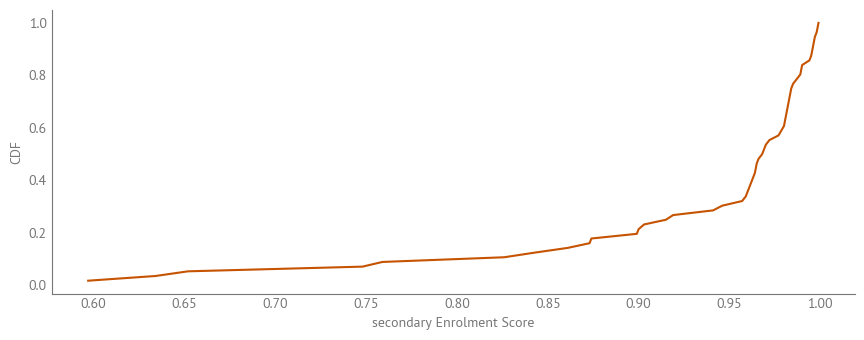

In [12]:
from empiricaldist import Cdf

cdf_score = Cdf.from_seq(df.loc[dinged, 'score'])
cdf_score.plot()
decorate(xlabel='secondary Enrolment Score', ylabel='CDF')

Here is the distribution of differences (female minus male in percentage points) for all countries with valid data.

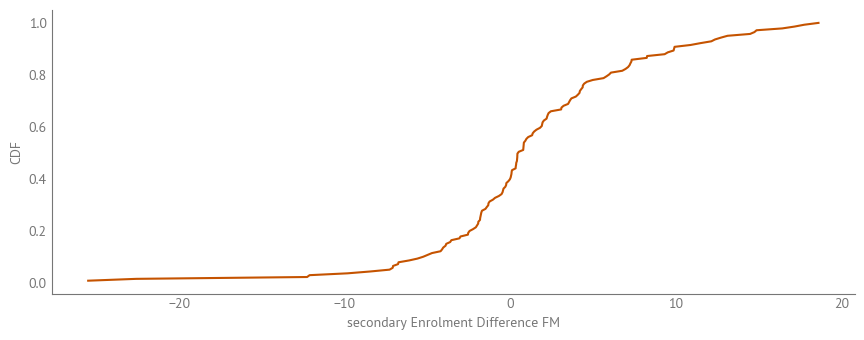

In [13]:
cdf_difference_fm = Cdf.from_seq(df['diff'])
cdf_difference_fm.plot()
decorate(xlabel='secondary Enrolment Difference FM', ylabel='CDF')


In countries where women are lagging, they lag by fewer than 10 percentage points in most cases. In countries where men are lagging, the differences are much bigger, sometimes 40-60 percentage points.
So the WEF metrics are hiding the biggest differences.

Here are the countries where women lag men.

In [14]:
subset = df[dinged]
subset.sort_values("diff", ascending=False)

,country,page_number,score,rank,diff,left,right
97,Nicaragua,277,0.999,86.0,-0.04,49.98,50.02
88,Moldova,259,0.999,87.0,-0.13,96.72,96.85
26,Canada,135,0.998,88.0,-0.25,109.21,109.46
59,Hungary,201,0.997,89.0,-0.26,99.56,99.82
117,Singapore,317,0.997,90.0,-0.31,102.88,103.19
70,Kazakhstan,223,0.996,92.0,-0.42,94.21,94.62
129,Thailand,341,0.996,91.0,-0.45,109.29,109.74
121,South Korea,325,0.995,93.0,-0.48,97.67,98.15
99,Nigeria,281,0.989,97.0,-0.54,46.96,47.50
113,Saudi Arabia,309,0.994,94.0,-0.70,119.61,120.31


The data for South Korea are weird. Male enrollment is 111% and for women it's "only" 95%.
Maybe the denominator is college-age people and "college age" is shifted because of mandatory military service?

The scores are based on ratios, not differences, so let's compute those.

In [15]:
df['ratio'] = df['left'] / df['right']
df['ratio'].describe()

count    141.000000
mean       0.938979
std        0.072358
min        0.596742
25%        0.911508
50%        0.963999
75%        0.986988
max        0.999897
Name: ratio, dtype: float64

Looks like the ratio IS the score.

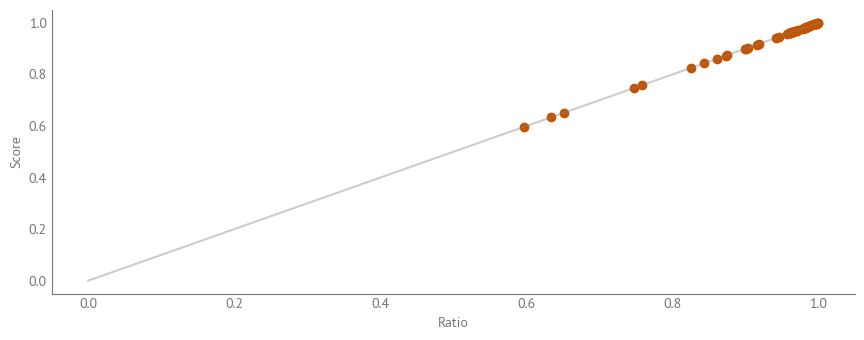

In [16]:
subset = df[dinged]
plt.plot([0, 1], [0, 1], color='gray', alpha=0.4)
plt.scatter(subset['ratio'], subset['score'])
decorate(xlabel='Ratio', ylabel='Score')


In [17]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    subset['ratio'], subset['score'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Slope: 0.9996893669251156
Intercept: 0.0003641199513879645
R-value: 0.9999956442855031
P-value: 2.6068904993609543e-138
Standard Error: 0.00040152659152907185


So here are the revised, symmetric scores.

In [18]:
df['revised_score'] = df['ratio']
df['revised_score'].describe()

count    141.000000
mean       0.938979
std        0.072358
min        0.596742
25%        0.911508
50%        0.963999
75%        0.986988
max        0.999897
Name: revised_score, dtype: float64

Here's the distribution of revised scores.

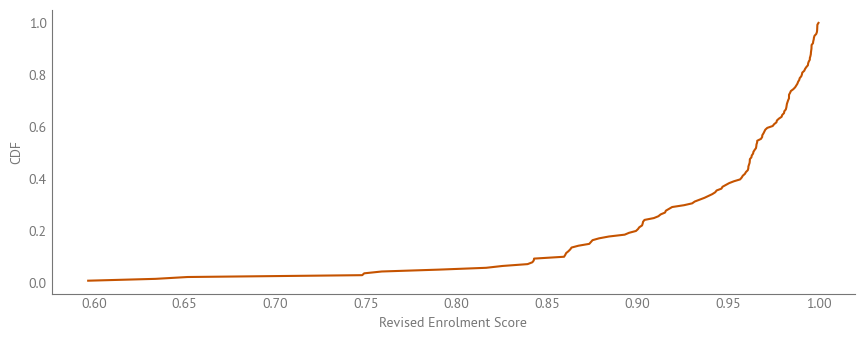

In [19]:
cdf_score = Cdf.from_seq(df['revised_score'])
cdf_score.plot()
decorate(xlabel='Revised Enrolment Score', ylabel='CDF')

In [20]:
revised = df[~dinged].dropna(subset=['ratio']).sort_values('revised_score')
revised.shape

(85, 9)

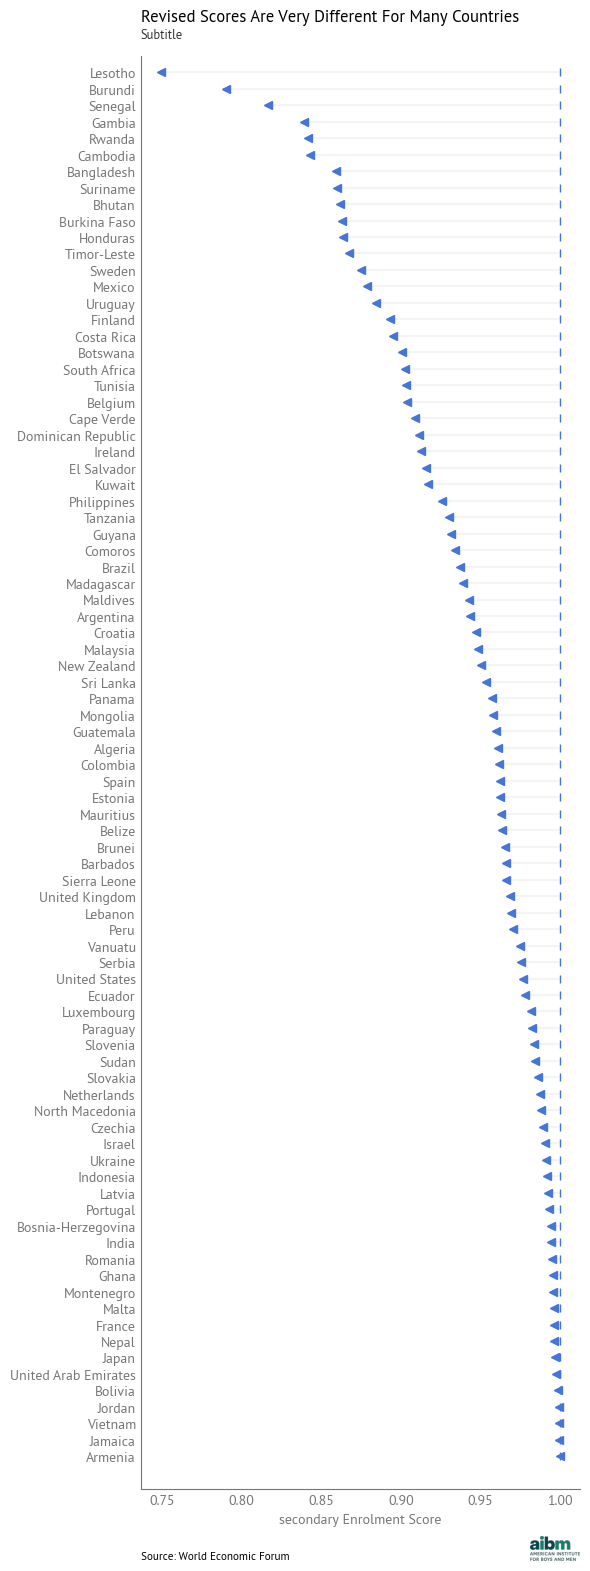

In [21]:
# make a figure that shows a horizontal line for each country that
# connects the revised score and the secondary enrolment score
# with a circle for the original and a triangle for the revised

from utils import add_title, add_subtext, add_logo

fig, ax = plt.subplots(figsize=(6, 15))
plt.hlines(revised['country'], 
           revised['score'], revised['revised_score'], 
           color=AIBM_COLORS['light_gray'])
plt.plot(revised['score'], revised['country'], '|', 
         color=AIBM_COLORS['blue'])
plt.plot(revised['revised_score'], revised['country'], '<', 
         color=AIBM_COLORS['blue'])
ax.invert_yaxis()

decorate(xlabel='secondary Enrolment Score', ylim=[len(revised)+1, -1])
add_title("Revised Scores Are Very Different For Many Countries",
          "Subtitle", y=1.01)
add_subtext("Source: World Economic Forum", y=-0.05)
logo = add_logo(location=(1.0, -0.05))



And here's the new ranking of countries based on revised scores.

In [22]:
columns = ['revised_rank', 'country', 'score', 'revised_score', 'diff']
df_sorted = df.dropna(subset=['ratio']).sort_values(by='revised_score', ascending=False)
df_sorted['revised_rank'] = np.arange(1, len(df_sorted)+1)
table = df_sorted[columns].round(2)
table.to_csv("wef_secondary_enrolment_table.csv", index=False)

In [23]:


df_sorted[columns].head(40).round(2)

,revised_rank,country,score,revised_score,diff
4,1,Armenia,1.00,1.00,0.01
67,2,Jamaica,1.00,1.00,0.06
143,3,Vietnam,1.00,1.00,0.07
97,4,Nicaragua,1.00,1.00,-0.04
69,5,Jordan,1.00,1.00,0.06
16,6,Bolivia,1.00,1.00,0.09
88,7,Moldova,1.00,1.00,-0.13
26,8,Canada,1.00,1.00,-0.25
59,9,Hungary,1.00,1.00,-0.26
136,10,United Arab Emirates,1.00,1.00,0.32


In [24]:
df_sorted[columns].tail(50).round(2)

,revised_rank,country,score,revised_score,diff
3,92,Argentina,1.00,0.94,6.75
83,93,Maldives,1.00,0.94,4.17
52,94,Germany,0.94,0.94,-6.12
81,95,Madagascar,1.00,0.94,2.21
19,96,Brazil,1.00,0.94,6.95
32,97,Comoros,1.00,0.93,4.27
57,98,Guyana,1.00,0.93,6.07
138,99,Tanzania,1.00,0.93,2.02
107,100,Philippines,1.00,0.93,7.24
47,101,Fiji,0.92,0.92,-7.09


In [25]:
df.query("country == 'Qatar'")

,country,page_number,score,rank,diff,left,right,ratio,revised_score
110,Qatar,303,0.982,105.0,-1.94,106.68,108.62,0.98214,0.98214


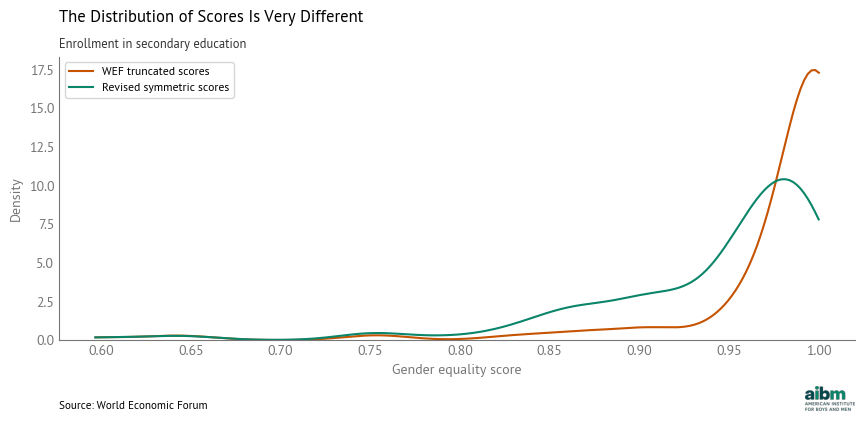

In [26]:
import seaborn as sns

options = dict(cut=0, bw_adjust=0.7)

sns.kdeplot(df['score'], label='WEF truncated scores', **options)
sns.kdeplot(df['revised_score'], label='Revised symmetric scores', **options)

decorate(xlabel='Gender equality score')

add_title("The Distribution of Scores Is Very Different",
          "Enrollment in secondary education")
add_subtext("Source: World Economic Forum", y=-0.25)
logo = add_logo(location=(1.0, -0.25))
None